## Проект "Различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков на HH.ru"

Описание: Анализ данных вакансий HH.ru

Цель проекта: Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.



Исходные данные получены из API HH.ru


### 1. Обзор исходных файлов с данными

In [1]:
#импортирую библиотеки:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#читаю файлы:
infa_1=pd.read_excel('C:/Users/Irishka/Downloads/vacancies_sa.xlsx')
infa_2=pd.read_excel('C:/Users/Irishka/Downloads/vacancies_da (1).xlsx')

In [3]:
infa_1.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [4]:
infa_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

In [5]:
#пропуски в данных:
infa_1.isna().mean()*100

id                                   0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          81.148825
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         81.409922
salary_to                           85.430809
salary_bin                           0.000000
key_skills_from_key_skills_field    33.472585
hard_skills_from_description        70.234987
soft_skills_from_description        25.483029
dtype: float64

In [6]:
#проверяю наличие явных дубликатов:
infa_1.duplicated().sum()

0

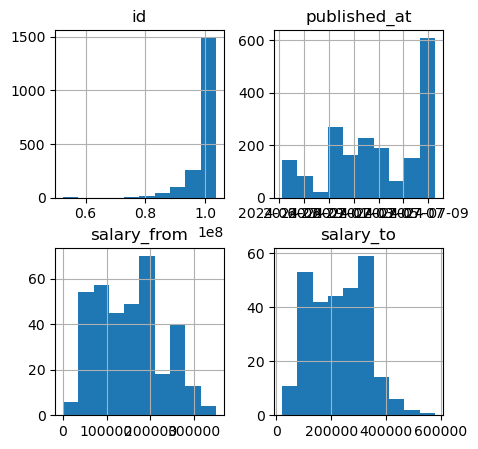

In [7]:
#строю гистограммы:
infa_1.hist(figsize=(5, 5))
plt.show()

#### 1.2. Данные по аналитикам данных:

In [8]:
infa_2.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [9]:
infa_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [10]:
#пропуски в данных:
infa_2.isna().mean()*100

id                                   0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          71.071627
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         80.677401
salary_to                           87.340366
salary_bin                           0.000000
key_skills_from_key_skills_field    39.311494
hard_skills_from_description        76.790672
soft_skills_from_description        67.351471
dtype: float64

In [11]:
#проверяю наличие явных дубликатов:
infa_2.duplicated().sum()

0

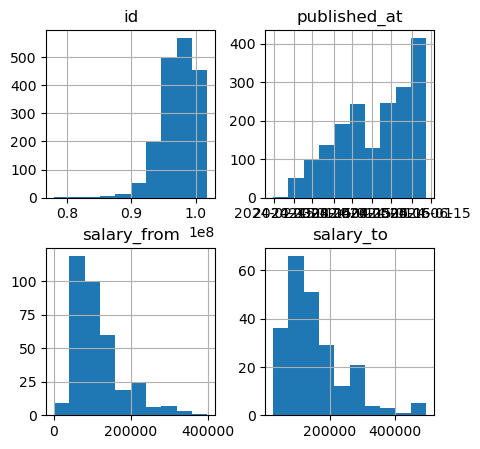

In [12]:
#строю гистограммы:
infa_2.hist(figsize=(5, 5))
plt.show()

### Вывод по главе:
- явные дубликаты в данных отсутствуют,
- есть пропуски в данных, причем для двух таблиц идентичные: department, salary_from,  salary_to, key_skills_from_key_skills_field, 
ky_skills, 
• hard_skills_from_descript, api. soft_skills_from_descri.
- есть аномалии в данных (характер гистограмм),
- названия у столбцов корректные, типы данных в столбцах корректные.

### 2. Предобработка данных

Наименования столбцов в двух таблицах совершенно идентичны, поэтому принимаю решение объединить две таблицы в один файл для удобства дальнейшего анализа:

In [13]:
infa= pd.concat([infa_1, infa_2], ignore_index=True)

#### 2.1. Удаление столбцов, которые не будут учавствовать в анализе

In [14]:
#название столбцов:
infa.columns

Index(['id', 'name', 'published_at', 'alternate_url', 'type', 'employer',
       'department', 'area', 'experience', 'key_skills', 'schedule',
       'employment', 'description', 'description_lemmatized', 'salary_from',
       'salary_to', 'salary_bin', 'key_skills_from_key_skills_field',
       'hard_skills_from_description', 'soft_skills_from_description'],
      dtype='object')

Принимаю решение удалить следующие столбцы:
- alternate_url - Ссылка на вакансию - 
- description - Описание вакансии - 
- description_lemmatized - Лемматизированное описание вакансии.

Они занимают место в таблице и не будут учавствовать в дальнейшем анализе.

In [15]:
infa = infa.drop(['alternate_url', 'description', 'description_lemmatized'], axis=1)

In [16]:
#проверяю:
infa.columns

Index(['id', 'name', 'published_at', 'type', 'employer', 'department', 'area',
       'experience', 'key_skills', 'schedule', 'employment', 'salary_from',
       'salary_to', 'salary_bin', 'key_skills_from_key_skills_field',
       'hard_skills_from_description', 'soft_skills_from_description'],
      dtype='object')

**Вывод:**  удалены столбцы alternate_url, 
descriptio, 
description_lemmatized, которые не панедобятся в дальнейшем анализе.

#### 2.2. Добавление столбца с категорией вакансии

In [17]:
#функция для добавления нового столбца:
def ololo(row):
    try:
        if "данных" in row:
            return 'Аналитик данных'
        elif 'системный' in row:
            return 'Системный аналитик'
        elif 'Системный' in row:
            return 'Системный аналитик'
        else:
            return 'Другая категория'
    except:
        pass
    
infa['category'] = infa['name'].apply(ololo)

In [18]:
#роверяю:
infa[['name','category']]

,name,category
0,Системный аналитик,Системный аналитик
1,Бизнес/Системный Аналитик,Системный аналитик
2,Системный IT аналитик,Системный аналитик
3,Системный Аналитик ERP-решений,Системный аналитик
4,Системный аналитик,Системный аналитик
...,...,...
3711,Аналитик данных в отдел онлайн-маркетинга (мон...,Аналитик данных
3712,Аналитик данных/специалист Excel,Аналитик данных
3713,Аналитик данных на производстве \ Data Analyst...,Аналитик данных
3714,Аналитик данных на производстве \ Data Analyst...,Аналитик данных


#### 2.3. Дубликаты

In [19]:
infa.duplicated().sum()

0

Явные дубликаты отсутствуют. Проверяю наличие неявных дубликатов по столбцам:

In [20]:
infa['name'].value_counts()

name
Системный аналитик                                                     568
Аналитик данных                                                        463
Data Analyst                                                            84
Системный аналитик 1С                                                   62
Ведущий системный аналитик                                              50
                                                                      ... 
Консультант / системный аналитик                                         1
Системный Аналитик Middle/Senior                                         1
Системный аналитик (middle/senior) на внедрение продукта Naumen BPM      1
Системный аналитик (архитектор)                                          1
Ведущий системный аналитик Microsoft Dynamics Navision                   1
Name: count, Length: 1574, dtype: int64

Тут все в порядке.

In [21]:
infa['experience'].value_counts()

experience
Junior+ (1-3 years)      1943
Middle (3-6 years)       1488
Junior (no experince)     228
Senior (6+ years)          57
Name: count, dtype: int64

Тут все в порядке.

In [22]:
infa['schedule'].value_counts()

schedule
Полный день         2644
Удаленная работа     960
Гибкий график        102
Сменный график        10
Name: count, dtype: int64

Тут все в порядке.

In [23]:
infa['employment'].value_counts()

employment
Полная занятость       3641
Стажировка               45
Частичная занятость      22
Проектная работа          8
Name: count, dtype: int64

Тут все в порядке.

**Вывод:** явные и неявные дубликаты не выявлены.

#### 2.4. Пропуски в данных

In [24]:
#пропуски в данных:
infa.isna().mean()*100

id                                   0.000000
name                                 0.000000
published_at                         0.000000
type                                 0.000000
employer                             0.000000
department                          76.264801
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
salary_from                         81.054898
salary_to                           86.356297
salary_bin                           0.000000
key_skills_from_key_skills_field    36.302476
hard_skills_from_description        73.412271
soft_skills_from_description        45.775027
category                             0.000000
dtype: float64

Рассматриваю столбец department:

In [25]:
infa['department'].value_counts()

department
Сбер для экспертов                                                       296
ГК Иннотех | Финтех (Иннотех)                                             59
ПАО «Промсвязьбанк», ИТ                                                   32
Сбер. IT                                                                  27
«МТС», Digital                                                            24
                                                                        ... 
Гринатом. Многофункциональный Центр Обслуживания. Закупки и логистика      1
BI.ZONE Направление Разработка                                             1
Группа НЛМК Эксперты и руководители                                        1
СберМаркет Разработка                                                      1
«Почта России», Офис                                                       1
Name: count, Length: 129, dtype: int64

В столбце department содержатся данные о работодателе и конкретно об отделе, а в столбце employer содержатся данные только о работодателе: 

In [26]:
dep_emp=infa[['department', 'employer']]

In [27]:
dep_emp.value_counts()

department                                                             employer                 
Сбер для экспертов                                                     СБЕР                         296
ГК Иннотех | Финтех (Иннотех)                                          Т1                            59
ПАО «Промсвязьбанк», ИТ                                                ПСБ (ПАО «Промсвязьбанк»)     32
Сбер. IT                                                               СБЕР                          27
«МТС», Digital                                                         МТС                           24
                                                                                                   ... 
Гознак. Информационные технологии                                      Гознак                         1
ГК РОСТ, Отдел аналитики                                               РОСТ, Группа компаний          1
ГК Иннотех | Сервионика                                                

Принимаю решение о замене пропусков данных в столбце department на данные из столбца employer:

In [28]:
#количество прпоусков до замены:
infa['department'].isna().sum()

2834

In [29]:
#замена:
infa['department']=infa['department'].fillna(infa['employer'])

In [30]:
#проверяю:
infa['department'].isna().sum()

0

Рассматриваю столбцы salary_from и salary_t:

Столбцы salary_from и 
salary_t напрямую зависят от данных столбца salary_bin.o Если в столбце salary_bin нет данных о зарплате, то и в столбцах salary_from и salary_to пусты. Принимаю решение остаить эти пропуски данных. 

Рассматриваю столбцы key_skills_from_key_skills_field, 
hard_skills_from_descriptionи 
soft_skills_from_descripti:on

Данные в столбцах key_skills_from_key_skills_field, hard_skills_from_description и soft_skills_from_description напрямую зависят от данных в столбце key_skills. Принимаю решение оставить эти пропуски данных, так как для дальнейшего анализа хватит данных из основного столбца с данными о навыках кандидата.

**Вывод:**
- обработаны пропуски данных в столбце department,
- проанализированы пропуски данных в столбцах salary_from, salary_t, key_skills_from_key_skills_field, hard_skills_from_description и soft_skills_from_description. Принято решение не заменять и не удалять пропуски в данных столбцах.

### Вывод по главе:
- удалены столбцы alternate_url, descriptio, description_lemmatized, которые не панедобятся в дальнейшем анализе;
- явные и неявные дубликаты не выявлены;
- обработаны пропуски данных в столбце department; 
проанализированы пропуски данных в столбцах salary_from, salary_t, key_skills_from_key_skills_field, hard_skills_from_description и soft_skills_from_description. Принято решение не заменять и не удалять пропуски в данных столбцах.

### 3. Исследовательский анализ данных

#### 3.1. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом

In [31]:
#по названию:
count_name=infa['name'].value_counts().head(10)
count_name

name
Системный аналитик            568
Аналитик данных               463
Data Analyst                   84
Системный аналитик 1С          62
Ведущий системный аналитик     50
Ведущий аналитик данных        30
Системный аналитик DWH         25
Data analyst                   25
Старший системный аналитик     24
Старший аналитик данных        23
Name: count, dtype: int64

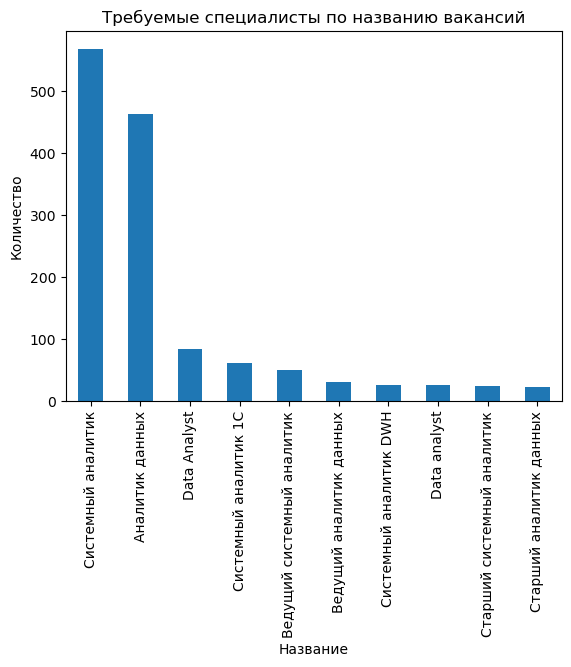

In [32]:
count_name.plot(style='-o',subplots= True,kind='bar')
plt.title('Требуемые специалисты по названию вакансий')
plt.xlabel('Название')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.show()

In [33]:
#по категории:
count_category=infa['category'].value_counts()
count_category

category
Системный аналитик    1781
Аналитик данных       1352
Другая категория       583
Name: count, dtype: int64

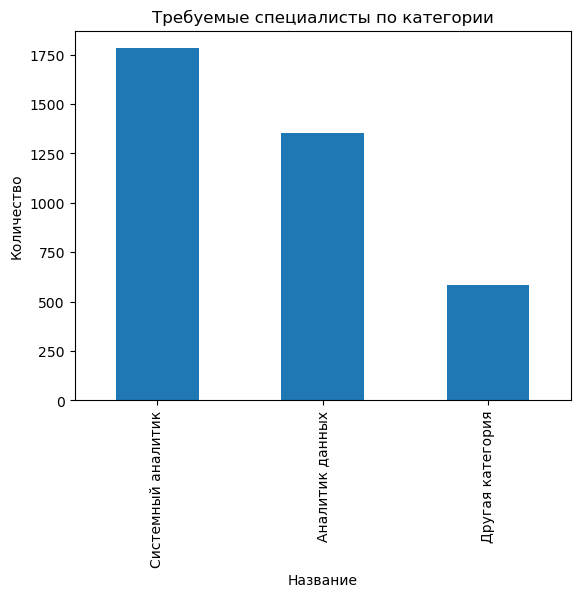

In [34]:
count_category.plot(style='-o',subplots= True,kind='bar')
plt.title('Требуемые специалисты по категории')
plt.xlabel('Название')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.show()

In [35]:
#по требуемому опыту:
count_experience=infa['experience'].value_counts()
count_experience

experience
Junior+ (1-3 years)      1943
Middle (3-6 years)       1488
Junior (no experince)     228
Senior (6+ years)          57
Name: count, dtype: int64

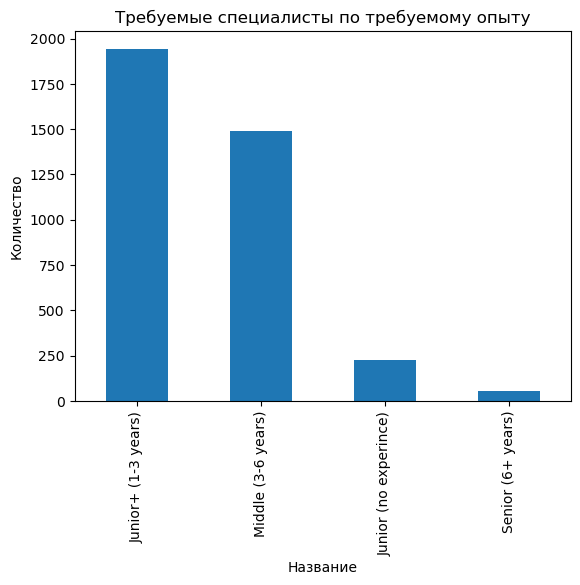

In [36]:
count_experience.plot(style='-o',subplots= True,kind='bar')
plt.title('Требуемые специалисты по требуемому опыту')
plt.xlabel('Название')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.show()

**Вывод:** 

количество по названию вакансий:
- Системный аналитик - 568,
- Аналитик данных - 463,
- Data Analyst - 84,
- Системный аналитик 1С - 62;

количество по категории вакансий: 
- системный аналитик - 1781,
- аналитик данных - 1352;

количество по требуемому опыту: 
- Junior+ (1-3 years) - 1943,
- Middle (3-6 years) - 1488,
- Junior (no experince) - 228,
- Senior (6+ years) - 57.

#### 3.2. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик

In [37]:
#группирую по категории и требуемому опыту:
category_experience = infa.groupby(['experience','category']).agg({'name':'count'})
category_experience

name
experience            category                
Junior (no experince) Аналитик данных      122
                      Другая категория      24
                      Системный аналитик    82
Junior+ (1-3 years)   Аналитик данных      865
                      Другая категория     262
                      Системный аналитик   816
Middle (3-6 years)    Аналитик данных      359
                      Другая категория     285
                      Системный аналитик   844
Senior (6+ years)     Аналитик данных        6
                      Другая категория      12
                      Системный аналитик    39

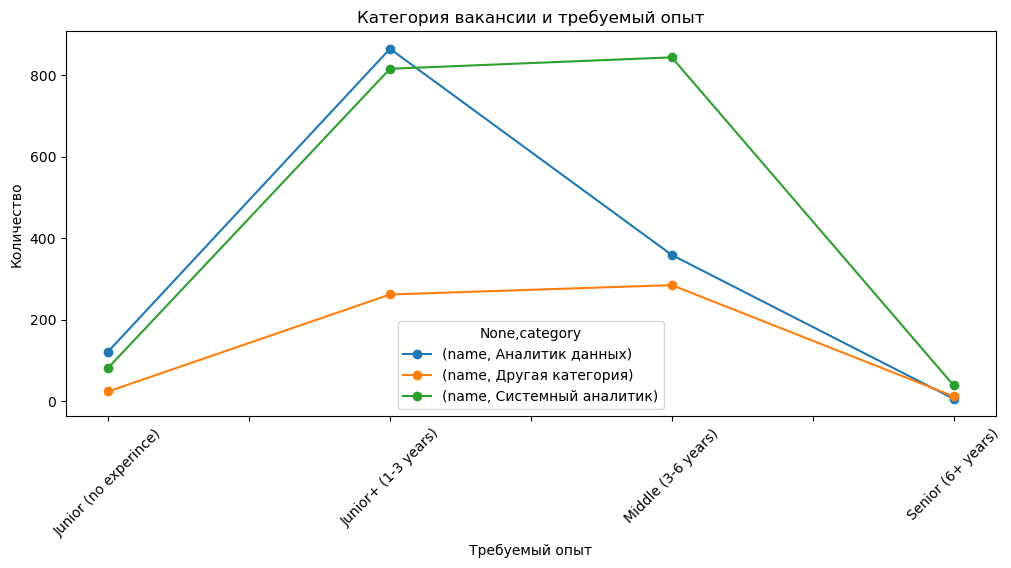

In [38]:
#строю диаграмму:
category_experience.unstack().plot(style='-o',figsize=(12,5))
plt.title('Категория вакансии и требуемый опыт')
plt.xlabel('Требуемый опыт')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

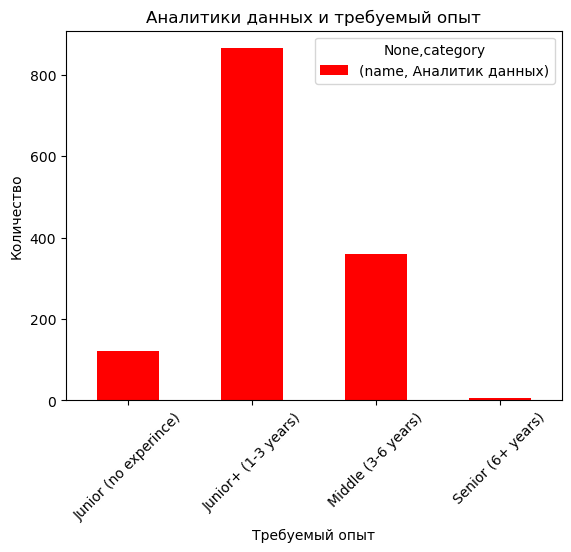

In [39]:
#строю столбчатую диаграмму отдельно по аналитикам данных:
category_experience.query('category == "Аналитик данных"').unstack().plot(kind='bar',color = 'r')
plt.title('Аналитики данных и требуемый опыт')
plt.xlabel('Требуемый опыт')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

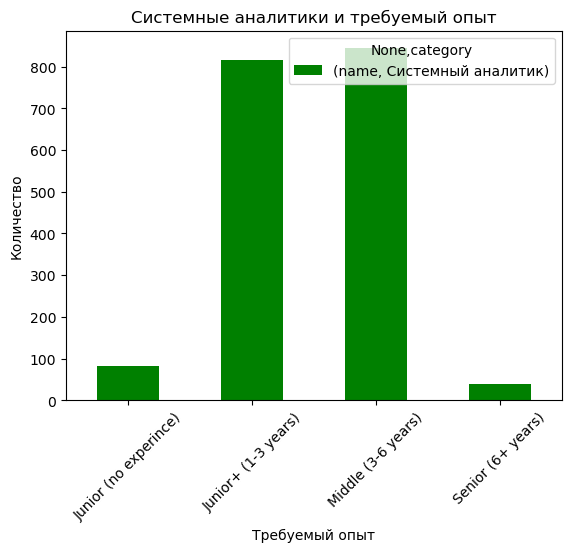

In [40]:
#строю столбчатую диаграмму отдельно по системным аналитикам:
category_experience.query('category == "Системный аналитик"').unstack().plot(kind='bar', color = 'g')
plt.title('Системные аналитики и требуемый опыт')
plt.xlabel('Требуемый опыт')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Вывод:**
- по требуемому опыту Junior (no experince) лидирует категория Аналитик данных - 122 шт.(53,5%),
- по требуемому опыту Junior+ (1-3 years) лидирует категория Аналитик данных - 865 шт.(44,5%),
- по требуемому опыту Middle (3-6 years) лидирует категория Системный аналитик - 844 шт.(56,7%),
- по требуемому опыту Senior (6+ years) лидирует категория Системный аналитик - 39 шт.(68,4%),
- можно выделить следующую закономерность: в основном требуются системные аналитики с опытом работы более 3х лет, в аналитиков данных охотно ищут и без опыта работы. 
  

#### 3.3. Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.


#### 3.3.1. Топ-5 работодателей

**Системные аналитики:**

Требуемый опыт Junior (no experince):

In [41]:
#группирую по категории, требуемому опыту и работодателю:
category_employer_experience_1 = infa.query('category == "Системный аналитик"').query('experience == "Junior (no experince)"').groupby(['category','experience','employer']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience_1

name
category           experience            employer                            
Системный аналитик Junior (no experince) Aston                             16
                                         Компания Апогей (1С-франчайзи)     8
                                         TWIGA Communication Group          5
                                         Ред Софт                           3
                                         Центр финансовых технологий        3

Требуемый опыт Junior+ (1-3 years):

In [42]:
#группирую по категории, требуемому опыту и работодателю:
category_employer_experience_2 = infa.query('category == "Системный аналитик"').query('experience == "Junior+ (1-3 years)"').groupby(['category','experience','employer']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience_2

name
category           experience          employer                             
Системный аналитик Junior+ (1-3 years) СБЕР                               41
                                       Aston                              22
                                       Совкомбанк Технологии              19
                                       Т1                                 17
                                       Красное & Белое, розничная сеть    16

Требуемый опыт Middle (3-6 years):

In [43]:
#группирую по категории, требуемому опыту и работодателю:
category_employer_experience_3 = infa.query('category == "Системный аналитик"').query('experience == "Middle (3-6 years)"').groupby(['category','experience','employer']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience_3

name
category           experience         employer                       
Системный аналитик Middle (3-6 years) Т1                           55
                                      СБЕР                         50
                                      ПСБ (ПАО «Промсвязьбанк»)    21
                                      Т-Банк                       19
                                      Aston                        18

Требуемый опыт Senior (6+ years):

In [44]:
#группирую по категории, требуемому опыту и работодателю:
category_employer_experience_4 = infa.query('category == "Системный аналитик"').query('experience == "Senior (6+ years)"').groupby(['category','experience','employer']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience_4

name
category           experience        employer                                             
Системный аналитик Senior (6+ years) Т1                                                  3
                                     Яндекс                                              2
                                     Mediascope                                          2
                                     БФТ-Холдинг (Бюджетные и Финансовые Технологии)     2
                                     ТестОпс                                             2

**Аналитики данных:**

Требуемый опыт Junior (no experince):

In [45]:
#группирую по категории, требуемому опыту и работодателю:
category_employer_experience_5 = infa.query('category == "Аналитик данных"').query('experience == "Junior (no experince)"').groupby(['category','experience','employer']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience_5

name
category        experience            employer                          
Аналитик данных Junior (no experince) СБЕР                            12
                                      МАГНИТ, Розничная сеть           7
                                      Согласие, страховая компания     4
                                      Юникон АП                        3
                                      DNS Технологии                   3

Требуемый опыт Junior+ (1-3 years):

In [46]:
#группирую по категории, требуемому опыту и работодателю:
category_employer_experience_6 = infa.query('category == "Аналитик данных"').query('experience == "Junior+ (1-3 years)"').groupby(['category','experience','employer']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience_6

name
category        experience          employer                  
Аналитик данных Junior+ (1-3 years) СБЕР                    87
                                    Банк ВТБ (ПАО)          24
                                    Ozon                    17
                                    Ростелеком              12
                                    Правительство Москвы    11

Требуемый опыт Middle (3-6 years):

In [47]:
#группирую по категории, требуемому опыту и работодателю:
category_employer_experience_7 = infa.query('category == "Аналитик данных"').query('experience == "Middle (3-6 years)"').groupby(['category','experience','employer']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience_7

name
category        experience         employer       
Аналитик данных Middle (3-6 years) СБЕР         25
                                   Т1           20
                                   Ozon         14
                                   Яндекс       14
                                   INGURU.RU     9

Требуемый опыт Senior (6+ years):

In [48]:
#группирую по категории, требуемому опыту и работодателю:
category_employer_experience_8 = infa.query('category == "Аналитик данных"').query('experience == "Senior (6+ years)"').groupby(['category','experience','employer']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience_8

name
category        experience        employer                
Аналитик данных Senior (6+ years) Aramco Innovations     1
                                  CloudPayments          1
                                  PayMatrix              1
                                  Spice Agency           1
                                  Мединвестгрупп         1

**Вывод:** 
- в вакансиях системных аналитиков лидируют компании: Junior (no experince) - Aston - 16 шт., Junior+ (1-3 years) -	СБЕР - 41 шт., Middle (3-6 years)	- Т1 - 55 шт., Senior (6+ years) - Т1 - 3 штт.;
- в вакансиях аналитиков данных лидируют компании: Junior (no experince) - СБЕР	- 12 шт., Junior+ (1-3 years) - СБЕР - 87 шт., Middle (3-6 years) - СБЕР - 25 шт., Senior (6+ years) - Aramco Innovations -  1 шт., CloudPayments - 1 шт., PayMatrix - 1 шт., Spice Agency -	1 шт., Мединвестгрупп - 1 шт.



#### 3.3.2. Заработная плата

**Системные аналитики:**

Требуемый опыт Junior (no experince):

In [49]:
#группирую по категории, требуемому опыту и зарплате:
category_employer_experience = infa.query('category == "Системный аналитик"').query('experience == "Junior (no experince)"').groupby(['category','experience','salary_bin']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category           experience            salary_bin                     
Системный аналитик Junior (no experince) ЗП не указана                44
                                         Меньше 100 тысяч             32
                                         От 100 тысяч до 200 тысяч     4
                                         Больше 300 тысяч              2

Требуемый опыт Junior+ (1-3 years):

In [50]:
#группирую по категории, требуемому опыту и зарплате:
category_employer_experience = infa.query('category == "Системный аналитик"').query('experience == "Junior+ (1-3 years)"').groupby(['category','experience','salary_bin']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category           experience          salary_bin                     
Системный аналитик Junior+ (1-3 years) ЗП не указана               719
                                       От 100 тысяч до 200 тысяч    51
                                       От 200 тысяч до 300 тысяч    30
                                       Меньше 100 тысяч              9
                                       Больше 300 тысяч              7

Требуемый опыт Middle (3-6 years):

In [51]:
#группирую по категории, требуемому опыту и зарплате:
category_employer_experience = infa.query('category == "Системный аналитик"').query('experience == "Middle (3-6 years)"').groupby(['category','experience','salary_bin']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category           experience         salary_bin                     
Системный аналитик Middle (3-6 years) ЗП не указана               716
                                      Больше 300 тысяч             64
                                      От 200 тысяч до 300 тысяч    45
                                      От 100 тысяч до 200 тысяч    19

Требуемый опыт Junior Senior (6+ years):

In [52]:
#группирую по категории, требуемому опыту и зарплате:
category_employer_experience = infa.query('category == "Системный аналитик"').query('experience == "Senior (6+ years)"').groupby(['category','experience','salary_bin']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category           experience        salary_bin                     
Системный аналитик Senior (6+ years) ЗП не указана                32
                                     Больше 300 тысяч              6
                                     От 200 тысяч до 300 тысяч     1

**Аналитики данных:**

Требуемый опыт Junior (no experince):

In [53]:
#группирую по категории, требуемому опыту и зарплате:
category_employer_experience = infa.query('category == "Аналитик данных"').query('experience == "Junior (no experince)"').groupby(['category','experience','salary_bin']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category        experience            salary_bin                     
Аналитик данных Junior (no experince) ЗП не указана                93
                                      Меньше 100 тысяч             24
                                      От 100 тысяч до 200 тысяч     5

Требуемый опыт Junior+ (1-3 years):

In [54]:
#группирую по категории, требуемому опыту и зарплате:
category_employer_experience = infa.query('category == "Аналитик данных"').query('experience == "Junior+ (1-3 years)"').groupby(['category','experience','salary_bin']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category        experience          salary_bin                     
Аналитик данных Junior+ (1-3 years) ЗП не указана               756
                                    От 100 тысяч до 200 тысяч    61
                                    Меньше 100 тысяч             34
                                    От 200 тысяч до 300 тысяч    13
                                    Больше 300 тысяч              1

Требуемый опыт Middle (3-6 years):

In [55]:
#группирую по категории, требуемому опыту и зарплате:
category_employer_experience = infa.query('category == "Аналитик данных"').query('experience == "Middle (3-6 years)"').groupby(['category','experience','salary_bin']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category        experience         salary_bin                     
Аналитик данных Middle (3-6 years) ЗП не указана               316
                                   Больше 300 тысяч             15
                                   От 100 тысяч до 200 тысяч    14
                                   От 200 тысяч до 300 тысяч    10
                                   Меньше 100 тысяч              4

Требуемый опыт Senior (6+ years):

In [56]:
#группирую по категории, требуемому опыту и зарплате:
category_employer_experience = infa.query('category == "Аналитик данных"').query('experience == "Senior (6+ years)"').groupby(['category','experience','salary_bin']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category        experience        salary_bin                     
Аналитик данных Senior (6+ years) ЗП не указана                 4
                                  От 200 тысяч до 300 тысяч     2

In [57]:
#сводная таблица со всеми категориями, требуемому опыту и зарплате:
res=infa.query('category != "Другая категория"').pivot_table(index=['category','experience'], columns='salary_bin',values='name',aggfunc='count')
res

salary_bin                                Больше 300 тысяч  ЗП не указана  \
category           experience                                               
Аналитик данных    Junior (no experince)               NaN           93.0   
                   Junior+ (1-3 years)                 1.0          756.0   
                   Middle (3-6 years)                 15.0          316.0   
                   Senior (6+ years)                   NaN            4.0   
Системный аналитик Junior (no experince)               2.0           44.0   
                   Junior+ (1-3 years)                 7.0          719.0   
                   Middle (3-6 years)                 64.0          716.0   
                   Senior (6+ years)                   6.0           32.0   

salary_bin                                Меньше 100 тысяч  \
category           experience                                
Аналитик данных    Junior (no experince)              24.0   
                   Junior+ (1-3 years)                34.0   
                   Middle (3-6 years)                  4.0   
                   Senior (6+ years)                   NaN   
Системный аналитик Junior (no experince)              32.0   
                   Junior+ (1-3 years)                 9.0   
                   Middle (3-6 years)                  NaN   
                   Senior (6+ years)                   NaN   

salary_bin                                От 100 тысяч до 200 тысяч  \
category           experience                                         
Аналитик данных    Junior (no experince)                        5.0   
                   Junior+ (1-3 years)                         61.0   
                   Middle (3-6 years)                          14.0   
                   Senior (6+ years)                            NaN   
Системный аналитик Junior (no experince)                        4.0   
                   Junior+ (1-3 years)                         51.0   
                   Middle (3-6 years)                          19.0   
                   Senior (6+ years)                            NaN   

salary_bin                                От 200 тысяч до 300 тысяч  
category           experience                                        
Аналитик данных    Junior (no experince)                        NaN  
                   Junior+ (1-3 years)                         13.0  
                   Middle (3-6 years)                          10.0  
                   Senior (6+ years)                            2.0  
Системный аналитик Junior (no experince)                        NaN  
                   Junior+ (1-3 years)                         30.0  
                   Middle (3-6 years)                          45.0  
                   Senior (6+ years)                            1.0

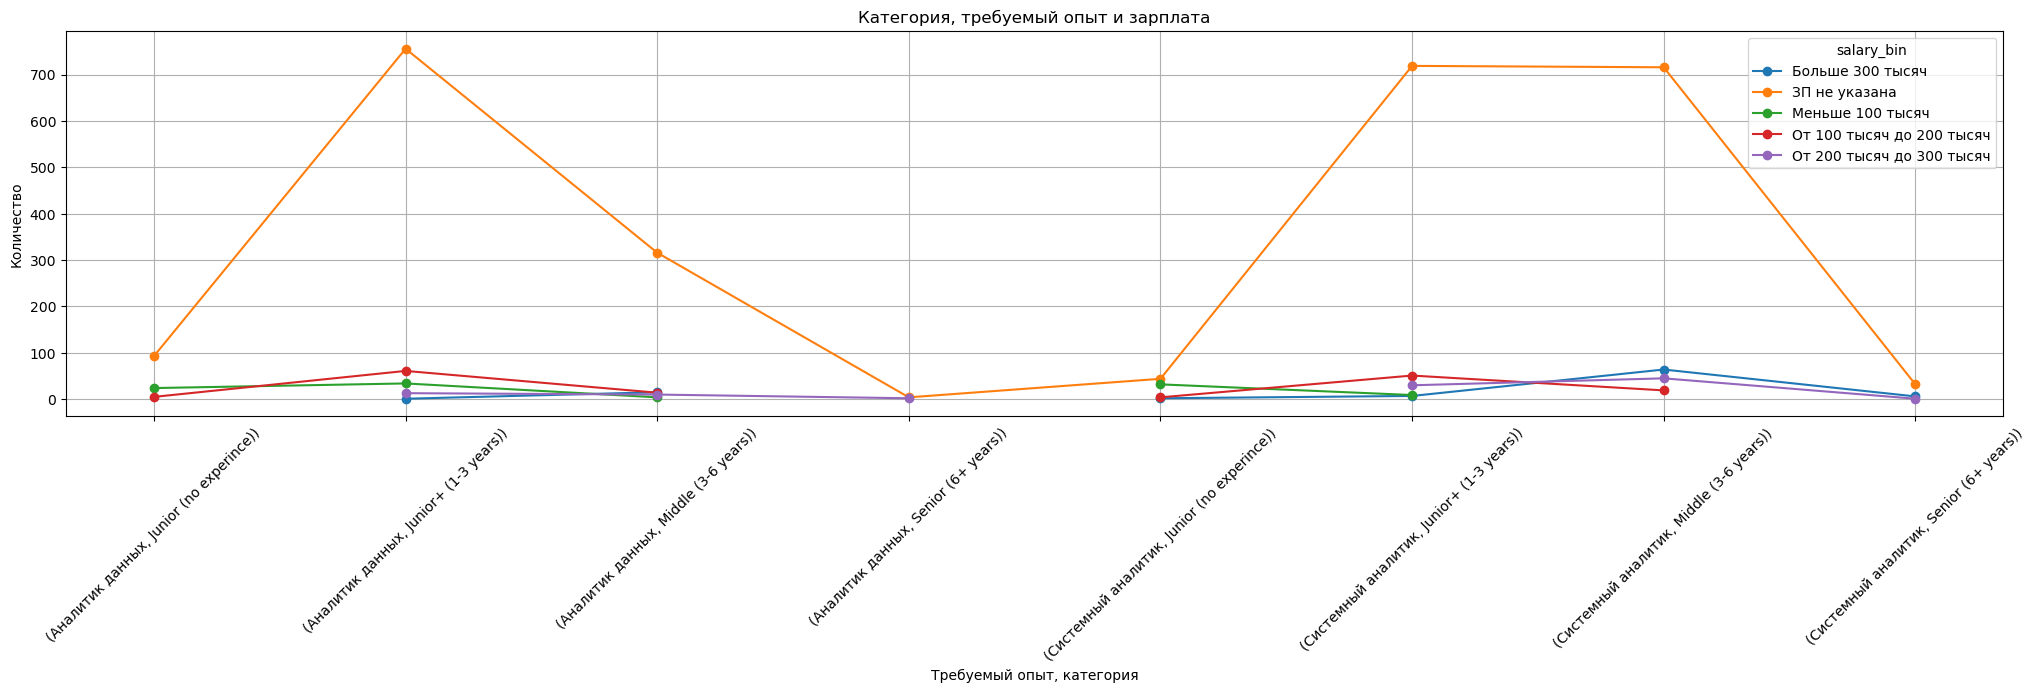

In [58]:
#общая диаграмма:
res.plot(style='-o', grid=True, figsize=(25, 5))
plt.title('Категория, требуемый опыт и зарплата')
plt.xlabel('Требуемый опыт, категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Вывод:** 
- в вакансиях системных аналитиков самая распространенная ставка по зарплате: Junior (no experince) - Меньше 100 тысяч - 32 шт., Junior+ (1-3 years) - От 100 тысяч до 200 тысяч - 51 шт., Middle (3-6 years) - Больше 300 тысяч - 64 шт., Senior (6+ years) - Больше 300 тысяч - 6 шт.;
- в вакансиях аналитиков данных самая распространенная ставка по зарплате: Junior (no experince) - Меньше 100 тысяч - 24 шт., Junior+ (1-3 years) - От 100 тысяч до 200 тысяч - 61 шт., Middle (3-6 years) - Больше 300 тысяч - 15 шт., Senior (6+ years) - От 200 тысяч до 300 тысяч - 2 шт.

#### 3.3.3. Тип занятости

**Системные аналитики:**

Требуемый опыт Junior (no experince):

In [59]:
#группирую по категории, требуемому опыту и типу занятости:
category_employer_experience = infa.query('category == "Системный аналитик"').query('experience == "Junior (no experince)"').groupby(['category','experience','employment']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category           experience            employment               
Системный аналитик Junior (no experince) Полная занятость       53
                                         Стажировка             28
                                         Частичная занятость     1

Требуемый опыт Junior+ (1-3 years):

In [60]:
#группирую по категории, требуемому опыту и типу занятости:
category_employer_experience = infa.query('category == "Системный аналитик"').query('experience == "Junior+ (1-3 years)"').groupby(['category','experience','employment']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category           experience          employment            
Системный аналитик Junior+ (1-3 years) Полная занятость   815
                                       Проектная работа     1

Требуемый опыт Middle (3-6 years)::

In [61]:
#группирую по категории, требуемому опыту и типу занятости:
category_employer_experience = infa.query('category == "Системный аналитик"').query('experience == "Middle (3-6 years)"').groupby(['category','experience','employment']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category           experience         employment               
Системный аналитик Middle (3-6 years) Полная занятость      838
                                      Частичная занятость     4
                                      Проектная работа        2

Требуемый опыт Senior (6+ years):

In [62]:
#группирую по категории, требуемому опыту и типу занятости:
category_employer_experience = infa.query('category == "Системный аналитик"').query('experience == "Senior (6+ years)"').groupby(['category','experience','employment']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

,,,name
category,experience,employment,
Системный аналитик,Senior (6+ years),Полная занятость,39


**Аналитики данных:**

Требуемый опыт Junior (no experince):

In [63]:
#группирую по категории, требуемому опыту и типу занятости:
category_employer_experience = infa.query('category == "Аналитик данных"').query('experience == "Junior (no experince)"').groupby(['category','experience','employment']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category        experience            employment               
Аналитик данных Junior (no experince) Полная занятость      107
                                      Стажировка             12
                                      Частичная занятость     3

Требуемый опыт Junior+ (1-3 years):

In [64]:
#группирую по категории, требуемому опыту и типу занятости:
category_employer_experience = infa.query('category == "Аналитик данных"').query('experience == "Junior+ (1-3 years)"').groupby(['category','experience','employment']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category        experience          employment               
Аналитик данных Junior+ (1-3 years) Полная занятость      854
                                    Частичная занятость     7
                                    Проектная работа        3
                                    Стажировка              1

Требуемый опыт Middle (3-6 years):

In [65]:
#группирую по категории, требуемому опыту и типу занятости:
category_employer_experience = infa.query('category == "Аналитик данных"').query('experience == "Middle (3-6 years)"').groupby(['category','experience','employment']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

name
category        experience         employment               
Аналитик данных Middle (3-6 years) Полная занятость      356
                                   Частичная занятость     2
                                   Проектная работа        1

Требуемый опыт Senior (6+ years):

In [66]:
#группирую по категории, требуемому опыту и типу занятости:
category_employer_experience = infa.query('category == "Аналитик данных"').query('experience == "Senior (6+ years)"').groupby(['category','experience','employment']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_employer_experience

,,,name
category,experience,employment,
Аналитик данных,Senior (6+ years),Полная занятость,6


In [67]:
#сводная таблица со всеми категориями, требуемому опыту и типу занятости:
res=infa.query('category != "Другая категория"').pivot_table(index=['category','experience'], columns='employment',values='name',aggfunc='count')
res

employment                                Полная занятость  Проектная работа  \
category           experience                                                  
Аналитик данных    Junior (no experince)             107.0               NaN   
                   Junior+ (1-3 years)               854.0               3.0   
                   Middle (3-6 years)                356.0               1.0   
                   Senior (6+ years)                   6.0               NaN   
Системный аналитик Junior (no experince)              53.0               NaN   
                   Junior+ (1-3 years)               815.0               1.0   
                   Middle (3-6 years)                838.0               2.0   
                   Senior (6+ years)                  39.0               NaN   

employment                                Стажировка  Частичная занятость  
category           experience                                              
Аналитик данных    Junior (no experince)        12.0                  3.0  
                   Junior+ (1-3 years)           1.0                  7.0  
                   Middle (3-6 years)            NaN                  2.0  
                   Senior (6+ years)             NaN                  NaN  
Системный аналитик Junior (no experince)        28.0                  1.0  
                   Junior+ (1-3 years)           NaN                  NaN  
                   Middle (3-6 years)            NaN                  4.0  
                   Senior (6+ years)             NaN                  NaN

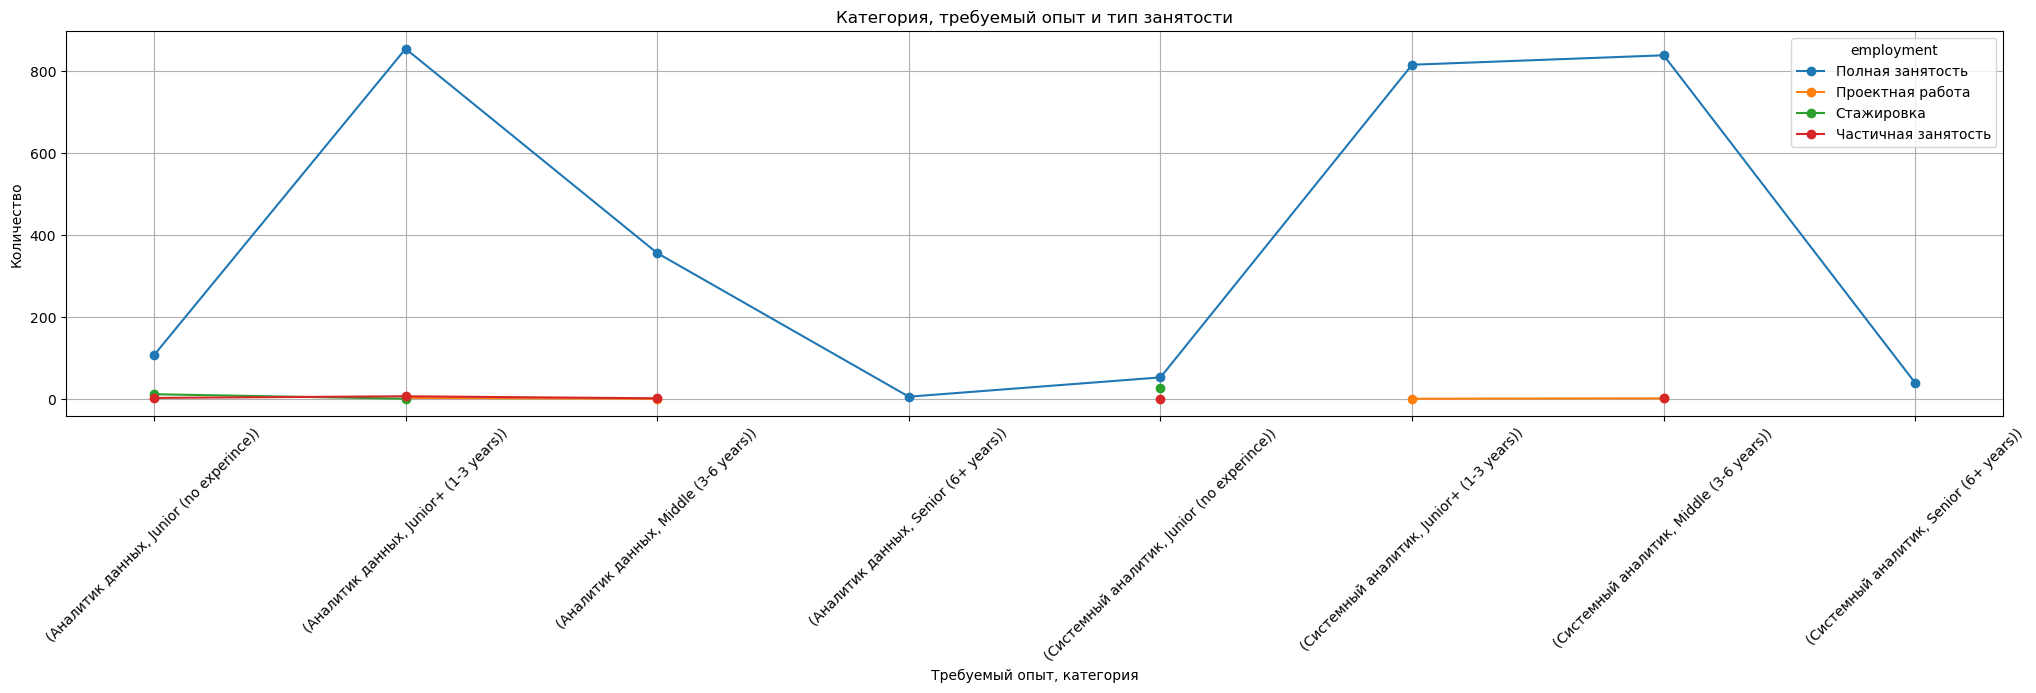

In [68]:
#общая диаграмма:
res.plot(style='-o', grid=True, figsize=(25, 5))
plt.title('Категория, требуемый опыт и тип занятости')
plt.xlabel('Требуемый опыт, категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Вывод:**
- по типу занятости в вакансиях системных аналитиков лидируют: Junior (no experince) - Полная занятость - 53 шт., Junior+ (1-3 years) - Полная занятость - 815 шт., Middle (3-6 years) - Полная занятость - 838 шт, Senior (6+ years) - Полная занятость - 39 шт.;
- по типу занятости в вакансиях аналитиков данных лидируют: Junior (no experince) - Полная занятость - 107 шт., Junior+ (1-3 years) - Полная занятость - 854 шт., Middle (3-6 years) - Полная занятость - 356 шт., Senior (6+ years) - Полная занятость - 6 шт.

#### 3.3.4. График работы

**Системный аналитик:**

Требуемый опыт Junior (no experince):

In [69]:
#группирую по категории, требуемому опыту и графику работы:
category_schedule_experience = infa.query('category == "Системный аналитик"').query('experience == "Junior (no experince)"').groupby(['category','experience','schedule']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_schedule_experience

name
category           experience            schedule              
Системный аналитик Junior (no experince) Полный день         47
                                         Удаленная работа    29
                                         Гибкий график        6

Требуемый опыт Junior+ (1-3 years):

In [70]:
#группирую по категории, требуемому опыту и графику работы:
category_schedule_experience = infa.query('category == "Системный аналитик"').query('experience == "Junior+ (1-3 years)"').groupby(['category','experience','schedule']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_schedule_experience

name
category           experience          schedule              
Системный аналитик Junior+ (1-3 years) Полный день        524
                                       Удаленная работа   259
                                       Гибкий график       33

Требуемый опыт Middle (3-6 years):

In [71]:
#группирую по категории, требуемому опыту и графику работы:
category_schedule_experience = infa.query('category == "Системный аналитик"').query('experience == "Middle (3-6 years)"').groupby(['category','experience','schedule']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_schedule_experience

name
category           experience         schedule              
Системный аналитик Middle (3-6 years) Полный день        526
                                      Удаленная работа   301
                                      Гибкий график       16
                                      Сменный график       1

Требуемый опыт Senior (6+ years):

In [72]:
#группирую по категории, требуемому опыту и графику работы:
category_schedule_experience = infa.query('category == "Системный аналитик"').query('experience == "Senior (6+ years)"').groupby(['category','experience','schedule']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_schedule_experience

name
category           experience        schedule              
Системный аналитик Senior (6+ years) Полный день         22
                                     Удаленная работа    15
                                     Гибкий график        2

**Аналитики данных:**

Требуемый опыт Junior (no experince):

In [73]:
#группирую по категории, требуемому опыту и графику работы:
category_schedule_experience = infa.query('category == "Аналитик данных"').query('experience == "Junior (no experince)"').groupby(['category','experience','schedule']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_schedule_experience

name
category        experience            schedule              
Аналитик данных Junior (no experince) Полный день        109
                                      Удаленная работа    10
                                      Гибкий график        2
                                      Сменный график       1

Требуемый опыт Junior+ (1-3 years):

In [74]:
#группирую по категории, требуемому опыту и графику работы:
category_schedule_experience = infa.query('category == "Аналитик данных"').query('experience == "Junior+ (1-3 years)"').groupby(['category','experience','schedule']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_schedule_experience

name
category        experience          schedule              
Аналитик данных Junior+ (1-3 years) Полный день        726
                                    Удаленная работа   116
                                    Гибкий график       16
                                    Сменный график       7

Требуемый опыт Middle (3-6 years):

In [75]:
#группирую по категории, требуемому опыту и графику работы:
category_schedule_experience = infa.query('category == "Аналитик данных"').query('experience == "Middle (3-6 years)"').groupby(['category','experience','schedule']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_schedule_experience

name
category        experience         schedule              
Аналитик данных Middle (3-6 years) Полный день        275
                                   Удаленная работа    71
                                   Гибкий график       13

Требуемый опыт Senior (6+ years):

In [76]:
#группирую по категории, требуемому опыту и графику работы:
category_schedule_experience = infa.query('category == "Аналитик данных"').query('experience == "Senior (6+ years)"').groupby(['category','experience','schedule']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(5)
category_schedule_experience

name
category        experience        schedule              
Аналитик данных Senior (6+ years) Полный день          5
                                  Удаленная работа     1

In [77]:
#сводная таблица со всеми категориями, требуемому опыту и графику работы:
res=infa.query('category != "Другая категория"').pivot_table(index=['category','experience'], columns='schedule',values='name',aggfunc='count')
res

schedule                                  Гибкий график  Полный день  \
category           experience                                          
Аналитик данных    Junior (no experince)            2.0        109.0   
                   Junior+ (1-3 years)             16.0        726.0   
                   Middle (3-6 years)              13.0        275.0   
                   Senior (6+ years)                NaN          5.0   
Системный аналитик Junior (no experince)            6.0         47.0   
                   Junior+ (1-3 years)             33.0        524.0   
                   Middle (3-6 years)              16.0        526.0   
                   Senior (6+ years)                2.0         22.0   

schedule                                  Сменный график  Удаленная работа  
category           experience                                               
Аналитик данных    Junior (no experince)             1.0              10.0  
                   Junior+ (1-3 years)               7.0             116.0  
                   Middle (3-6 years)                NaN              71.0  
                   Senior (6+ years)                 NaN               1.0  
Системный аналитик Junior (no experince)             NaN              29.0  
                   Junior+ (1-3 years)               NaN             259.0  
                   Middle (3-6 years)                1.0             301.0  
                   Senior (6+ years)                 NaN              15.0

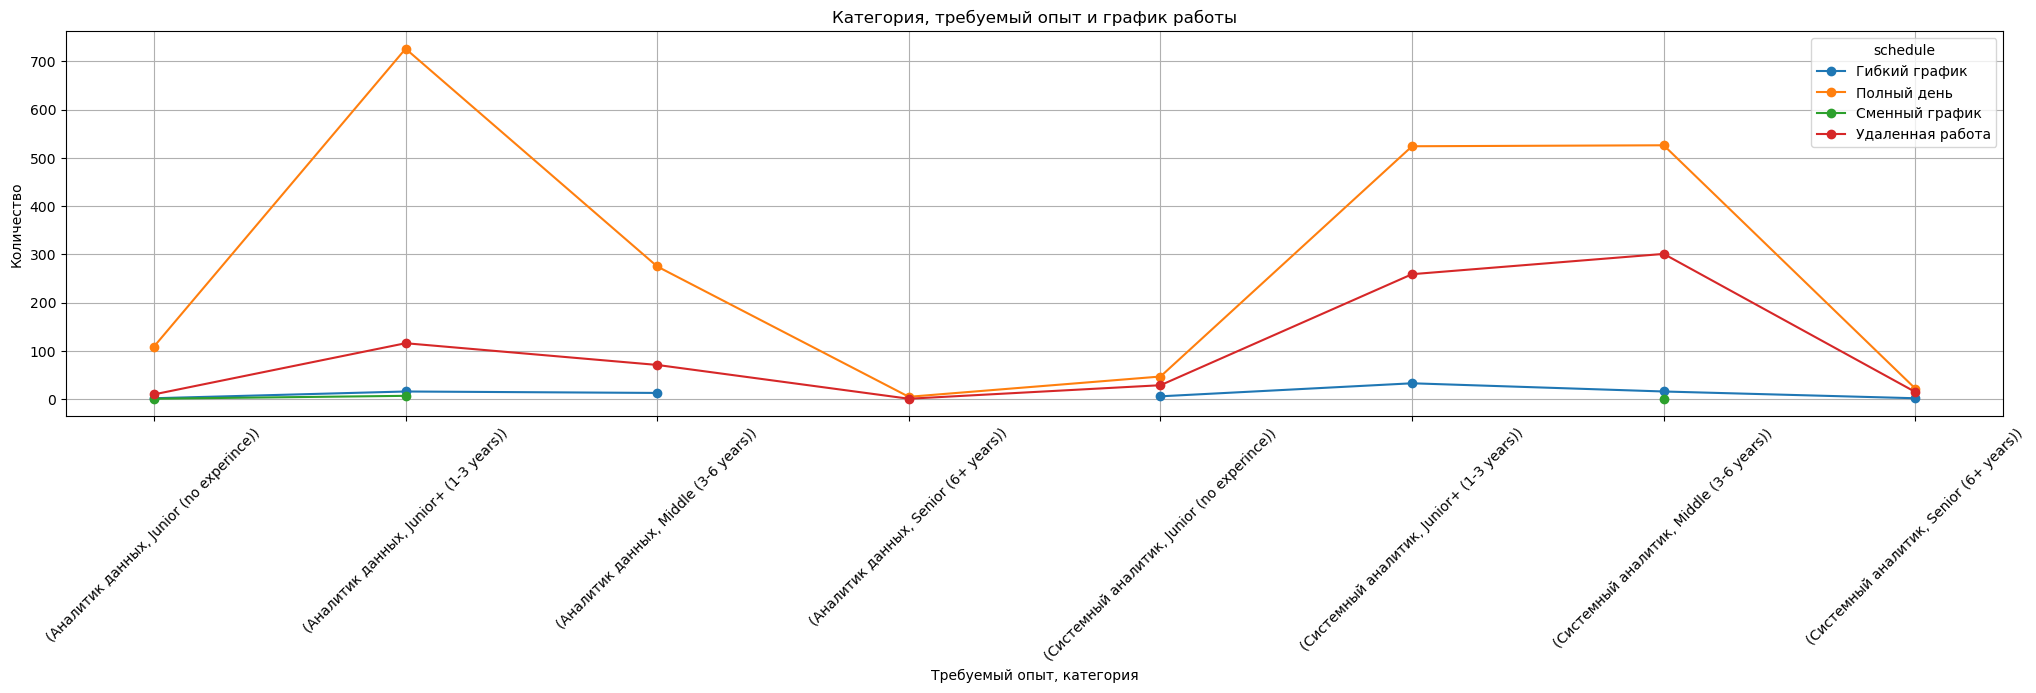

In [78]:
#общая диаграмма:
res.plot(style='-o', grid=True, figsize=(25, 5))
plt.title('Категория, требуемый опыт и график работы')
plt.xlabel('Требуемый опыт, категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Вывод:** 
- по графику работы в вакансиях системных аналитиков лидируют: Junior (no experince) - Полный день - 47 шт., Junior+ (1-3 years) - Полный день - 524 шт., Middle (3-6 years) - Полный день - 526 шт., Senior (6+ years) - Полный день - 22 шт.;
- по графику работы в вакансиях аналитиков данных лидируют: Junior (no experince) - Полный день - 109 шт., Junior+ (1-3 years) - Полный день - 726 шт., Middle (3-6 years) - Полный день - 275 шт., Senior (6+ years) - Полный день	- 5 шт.

### Вывод по подпункту:
- в вакансиях системных аналитиков лидируют компании: Junior (no experince) - Aston - 16 шт., Junior+ (1-3 years) - СБЕР - 41 шт., Middle (3-6 years) - Т1 - 55 шт., Senior (6+ years) - Т1 - 3 шт.;
- в вакансиях аналитиков данных лидируют компании: Junior (no experince) - СБЕР - 12 шт., Junior+ (1-3 years) - СБЕР - 87 шт., Middle (3-6 years) - СБЕР - 25 шт., Senior (6+ years) - Aramco Innovations - 1 шт., CloudPayments - 1 шт., PayMatrix - 1 шт., Spice Agency - 1 шт., Мединвестгрупп - 1 шт.;

- в вакансиях системных аналитиков самая распространенная ставка по зарплате: Junior (no experince) - Меньше 100 тысяч - 32 шт., Junior+ (1-3 years) - От 100 тысяч до 200 тысяч - 51 шт., Middle (3-6 years) - Больше 300 тысяч - 64 шт., Senior (6+ years) - Больше 300 тысяч - 6 шт.;
- в вакансиях аналитиков данных самая распространенная ставка по зарплате: Junior (no experince) - Меньше 100 тысяч - 24 шт., Junior+ (1-3 years) - От 100 тысяч до 200 тысяч - 61 шт., Middle (3-6 years) - Больше 300 тысяч - 15 шт., Senior (6+ years) - От 200 тысяч до 300 тысяч - 2 шт.;
- по типу занятости в вакансиях системных аналитиков лидируют: Junior (no experince) - Полная занятость - 53 шт., Junior+ (1-3 years) - Полная занятость - 815 шт., Middle (3-6 years) - Полная занятость - 838 шт, Senior (6+ years) - Полная занятость - 39 шт.;
- по типу занятости в вакансиях аналитиков данных лидируют: Junior (no experince) - Полная занятость - 107 шт., Junior+ (1-3 years) - Полная занятость - 854 шт., Middle (3-6 years) - Полная занятость - 356 шт., Senior (6+ years) - Полная занятость - 6 шт.;
- по графику работы в вакансиях системных аналитиков лидируют: Junior (no experince) - Полный день - 47 шт., Junior+ (1-3 years) - Полный день - 524 шт., Middle (3-6 years) - Полный день - 526 шт., Senior (6+ years) - Полный день - 22 шт.;
- по графику работы в вакансиях аналитиков данных лидируют: Junior (no experince) - Полный день - 109 шт., Junior+ (1-3 years) - Полный день - 726 шт., Middle (3-6 years) - Полный день - 275 шт., Senior (6+ years) - Полный день - 5 шт.;


- **типичное место работы для системного аналитика:** Junior (no experince) - в компании Aston с зарплатой менее 100 тысяч с полной занятостью и полным рабочим днем; Junior+ (1-3 years) - в компании СБЕР с зарплатой от 100 тысяч до 200 тысяч с полной занятостью и полным рабочим днем; Middle (3-6 years) - в компании T1 с зарплатой больше 300 тысяч с полной занятостью и полным рабочим днем; Senior (6+ years) - в компании Т1 с зарплатой больше 300 тысяч с полной занятостью и полным рабочим днем;
- **типичное место работы для аналитика данных:** Junior (no experince) - в компании СБЕР с зарплатой менее 100 тысяч с полной занятостью и полным рабочим днем; Junior+ (1-3 years) - в компании СБЕР с зарплатой от 100 тысяч до 200 тысяч с полной занятостью и полным рабочим днем; Middle (3-6 years) - в компании СБЕР с зарплатой больше 300 тысяч с полной занятостью и полным рабочим днем.

#### 3.4. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.


Сначала рассмотрим твердые навыки:

In [79]:
#группирую по категории, опыту и твердым навыкам:
category_hard_skills_experience = infa.query('category == "Системный аналитик"').groupby(['category','experience','hard_skills_from_description']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(10)
category_hard_skills_experience

name
category           experience            hard_skills_from_description      
Системный аналитик Middle (3-6 years)    confluence                     273
                   Junior+ (1-3 years)   confluence                     215
                   Senior (6+ years)     confluence                      10
                   Junior (no experince) confluence                       9
                   Middle (3-6 years)    confluence, Юнит-экономика       4
                   Junior+ (1-3 years)   Юнит-экономика                   3
                   Middle (3-6 years)    Юнит-экономика                   3
                   Junior+ (1-3 years)   Pandas                           2
                                         confluence, Юнит-экономика       2
                   Middle (3-6 years)    Pandas                           1

In [88]:
#группирую по категории, опыту и твердым навыкам:
category_hard_skills_experience = infa.query('category == "Аналитик данных"').groupby(['category','experience','hard_skills_from_description']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(10)
category_hard_skills_experience

name
category        experience            hard_skills_from_description      
Аналитик данных Junior+ (1-3 years)   Pandas                          96
                Middle (3-6 years)    Pandas                          62
                Junior+ (1-3 years)   confluence                      37
                Middle (3-6 years)    confluence                      18
                Junior (no experince) Pandas                          12
                Junior+ (1-3 years)   Pandas, confluence              11
                                      Юнит-экономика                   9
                Junior (no experince) confluence                       3
                Junior+ (1-3 years)   Pandas, Юнит-экономика           3
                                      Google Sheets                    2

Рассмотрим мягкие навыки:

In [87]:
#группирую по категории, опыту и твердым навыкам:
category_hard_skills_experience = infa.query('category == "Системный аналитик"').groupby(['category','experience','soft_skills_from_description']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(10)
category_hard_skills_experience

name
category           experience            soft_skills_from_description              
Системный аналитик Middle (3-6 years)    Документация                           455
                   Junior+ (1-3 years)   Документация                           390
                   Middle (3-6 years)    Коммуникация, Документация              80
                   Junior+ (1-3 years)   Коммуникация, Документация              75
                                         Документация, Аналитическое мышление    33
                                         Коммуникация                            32
                   Middle (3-6 years)    Коммуникация                            29
                   Junior (no experince) Документация                            27
                   Middle (3-6 years)    Документация, Аналитическое мышление    23
                   Junior+ (1-3 years)   Аналитическое мышление                  23

In [86]:
#группирую по категории, опыту и твердым навыкам:
category_hard_skills_experience = infa.query('category == "Аналитик данных"').groupby(['category','experience','soft_skills_from_description']).agg({'name':'count'}).sort_values(by='name',ascending=False).head(10)
category_hard_skills_experience

name
category        experience            soft_skills_from_description      
Аналитик данных Junior+ (1-3 years)   Документация                    98
                                      Аналитическое мышление          78
                Middle (3-6 years)    Документация                    75
                Junior+ (1-3 years)   Коммуникация                    48
                Middle (3-6 years)    Коммуникация                    19
                Junior+ (1-3 years)   Проактивность                   16
                                      Коммуникация, Документация      15
                Junior (no experince) Документация                    11
                                      Коммуникация                    10
                Middle (3-6 years)    Аналитическое мышление           9

### Вывод по подпункту:
- Из хардскилов для системных аналитиков наиболее предпочтительно: Junior (no experince) - знание программы confluence - 9 шт., Junior+ (1-3 years) - знание программы confluence - 215 шт., Middle (3-6 years) - знание программы confluence - 273 шт., Senior (6+ years) - знание программы confluence - 10 шт.,
- Из хардскилов для аналитиков данных наиболее предпочтительно: Junior (no experince) - знание библиотеки pandas - 12 шт., Junior+ (1-3 years) - знание библиотеки pandas - 96 шт., Middle (3-6 years) - знание библиотеки pandas - 62 шт., Senior (6+ years) - знание программы confluence - 1 шт.,
- Из мягких скилов для системных аналитиков наиболее предпочтительно: Junior (no experince) - знание документации - 27 шт., Junior+ (1-3 years) - знание документации - 390 шт., Middle (3-6 years) - знание документации - 455 шт., Senior (6+ years) - знание документации - 20 шт.,
- Из мягких скилов для аналитиков данных наиболее предпочтительно: Junior (no experince) - знание документации, развитая коммуникация - 11 шт., Junior+ (1-3 years) - знание документации, аналитическое мышление - 98 шт., Middle (3-6 years) - знание документации, коммуникация и аналитичекое мышление - 75 шт., Senior (6+ years) - знание документации, коммуникация и аналитичекое мышление, проактивность - 2 шт.,
- **Причем можно заметить общую закономерность**: чем выше требуемый опыт, тем больше хардскилов требуют от соискателей вакансии.

### 4. Общий вывод:
1) После **предварительного анализа** данных выявлено:
- явные дубликаты в данных отсутствуют,
- есть пропуски в данных, причем для двух таблиц идентичные: department, salary_from, salary_to, key_skills_from_key_skills_field, ky_skills, hard_skills_from_descript, api. soft_skills_from_descri.
- есть аномалии в данных (характер гистограмм),
- названия у столбцов корректные, типы данных в столбцах корректные.

2) После **подробного анализа полученных данных** проделана следующая работа:
- удалены столбцы alternate_url, descriptio, description_lemmatized, которые не панедобятся в дальнейшем анализе;
- явные и неявные дубликаты не выявлены;
- обработаны пропуски данных в столбце department; проанализированы пропуски данных в столбцах salary_from, salary_t, key_skills_from_key_skills_field, hard_skills_from_description и soft_skills_from_description. Принято решение не заменять и не удалять пропуски в данных столбцах.

3) в вакансиях системных аналитиков **лидируют компании**:
- Junior (no experince) - Aston - 16 шт.,
- Junior+ (1-3 years) - СБЕР - 41 шт.,
- Middle (3-6 years) - Т1 - 55 шт.,
- Senior (6+ years) - Т1 - 3 шт.;

5) в вакансиях аналитиков данных **лидируют компании**:
- Junior (no experince) - СБЕР - 12 шт.,
- Junior+ (1-3 years) - СБЕР - 87 шт.,
- Middle (3-6 years) - СБЕР - 25 шт.,
- Senior (6+ years) - Aramco Innovations - 1 шт., CloudPayments - 1 шт., PayMatrix - 1 шт., Spice Agency - 1 шт., Мединвестгрупп - 1 шт.;

7) в вакансиях системных аналитиков **самая распространенная ставка по зарплате**:
- Junior (no experince) - Меньше 100 тысяч - 32 шт.,
- Junior+ (1-3 years) - От 100 тысяч до 200 тысяч - 51 шт.,
- Middle (3-6 years) - Больше 300 тысяч - 64 шт.,
- Senior (6+ years) - Больше 300 тысяч - 6 шт.;

9) в вакансиях аналитиков данных самая **распространенная ставка по зарплате**:
- Junior (no experince) - Меньше 100 тысяч - 24 шт.,
- Junior+ (1-3 years) - От 100 тысяч до 200 тысяч - 61 шт.,
- Middle (3-6 years) - Больше 300 тысяч - 15 шт.,
- Senior (6+ years) - От 200 тысяч до 300 тысяч - 2 шт.;

11) **по типу занятости** в вакансиях системных аналитиков лидируют:
- Junior (no experince) - Полная занятость - 53 шт.,
- Junior+ (1-3 years) - Полная занятость - 815 шт.,
- Middle (3-6 years) - Полная занятость - 838 шт,
- Senior (6+ years) - Полная занятость - 39 шт.;

13) **по типу занятости** в вакансиях аналитиков данных лидируют:
- Junior (no experince) - Полная занятость - 107 шт.,
- Junior+ (1-3 years) - Полная занятость - 854 шт.,
- Middle (3-6 years) - Полная занятость - 356 шт.,
- Senior (6+ years) - Полная занятость - 6 шт.;

15) **по графику работы** в вакансиях системных аналитиков лидируют:
- Junior (no experince) - Полный день - 47 шт.,
- Junior+ (1-3 years) - Полный день - 524 шт.,
- Middle (3-6 years) - Полный день - 526 шт.,
- Senior (6+ years) - Полный день - 22 шт.;

17) **по графику работы** в вакансиях аналитиков данных лидируют:
- Junior (no experince) - Полный день - 109 шт.,
- Junior+ (1-3 years) - Полный день - 726 шт.,
- Middle (3-6 years) - Полный день - 275 шт.,
- Senior (6+ years) - Полный день - 5 шт.;

19) **типичное место работы** для системного аналитика:
- Junior (no experince) - в компании Aston с зарплатой менее 100 тысяч с полной занятостью и полным рабочим днем;
- Junior+ (1-3 years) - в компании СБЕР с зарплатой от 100 тысяч до 200 тысяч с полной занятостью и полным рабочим днем;
- Middle (3-6 years) - в компании T1 с зарплатой больше 300 тысяч с полной занятостью и полным рабочим днем;
- Senior (6+ years) - в компании Т1 с зарплатой больше 300 тысяч с полной занятостью и полным рабочим днем;

21) **типичное место работы** для аналитика данных:
- Junior (no experince) - в компании СБЕР с зарплатой менее 100 тысяч с полной занятостью и полным рабочим днем;
- Junior+ (1-3 years) - в компании СБЕР с зарплатой от 100 тысяч до 200 тысяч с полной занятостью и полным рабочим днем;
- Middle (3-6 years) - в компании СБЕР с зарплатой больше 300 тысяч с полной занятостью и полным рабочим днем.

23) **Из хардскилов** для системных аналитиков наиболее предпочтительно:
- Junior (no experince) - знание программы confluence - 9 шт.,
- Junior+ (1-3 years) - знание программы confluence - 215 шт.,
- Middle (3-6 years) - знание программы confluence - 273 шт.,
- Senior (6+ years) - знание программы confluence - 10 шт.,

25) **Из хардскилов** для аналитиков данных наиболее предпочтительно:
- Junior (no experince) - знание библиотеки pandas - 12 шт.,
- Junior+ (1-3 years) - знание библиотеки pandas - 96 шт.,
- Middle (3-6 years) - знание библиотеки pandas - 62 шт.,
- Senior (6+ years) - знание программы confluence - 1 шт.,
    
27) **Из мягких скилов** для системных аналитиков наиболее предпочтительно:
- Junior (no experince) - знание документации - 27 шт.,
- Junior+ (1-3 years) - знание документации - 390 шт.,
- Middle (3-6 years) - знание документации - 455 шт.,
- Senior (6+ years) - знание документации - 20 шт.,
    
29) **Из мягких скилов** для аналитиков данных наиболее предпочтительно:
- Junior (no experince) - знание документации, развитая коммуникация - 11 шт.,
- Junior+ (1-3 years) - знание документации, аналитическое мышление - 98 шт.,
- Middle (3-6 years) - знание документации, коммуникация и аналитичекое мышление - 75 шт.,
- Senior (6+ years) - знание документации, коммуникация и аналитичекое мышление, проактивность - 2 шт.,
    
31) **Причем можно заметить общую закономерность: чем выше требуемый опыт, тем больше хардскилов требуют от соискателей вакансии.**